In [24]:
import re
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import re
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy.ma as ma
BAD_VALUE = -999

### Data Formating Function

In [25]:
def generate_dataset(name):
    
    with open(name) as f:
      lines = f.readlines()[7:]

    rain_array = []
    
    for line in lines:

        split_line = re.split(r'[\t\n]',line.strip())[1:]
        
        if ("** line too long **" in split_line[-1]):
            split_line.pop()
        
        split_line = list(map(lambda x : float(x) , split_line))
        
        while (len(split_line) < 1440):
            split_line.append(BAD_VALUE)
        
        rain_array.append(split_line)

    return np.array(rain_array)

### Function to plot Contour Map

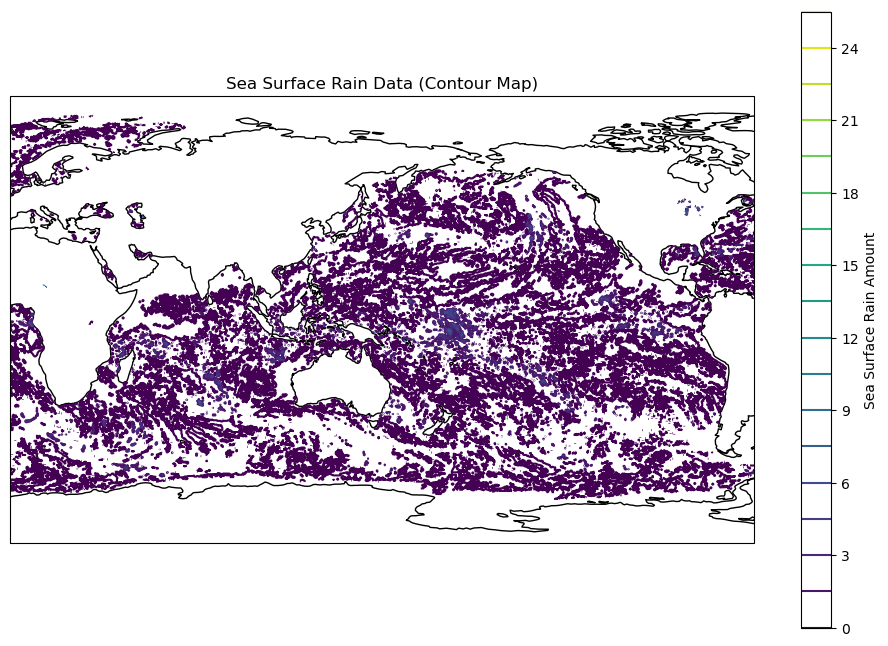

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_contour(data,title):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    # Create contour plot
    contour_levels = 20  # You can adjust the number of contour levels as needed
    contour_plot = ax.contour(data, contour_levels, origin='lower', cmap='viridis', extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180), vmin=0, vmax=25)

    ax.add_feature(cfeature.COASTLINE)

    cbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical', label='Sea Surface Rain Amount')
    

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    ax.set_extent([0, 300, -90, 90], ccrs.PlateCarree())

    # Display the contour map
    plt.show()

# Example usage:
# Assuming you have your rain data in a variable called 'rain_data'
plot_contour(masked_data,"Sea Surface Rain Data (Contour Map)")

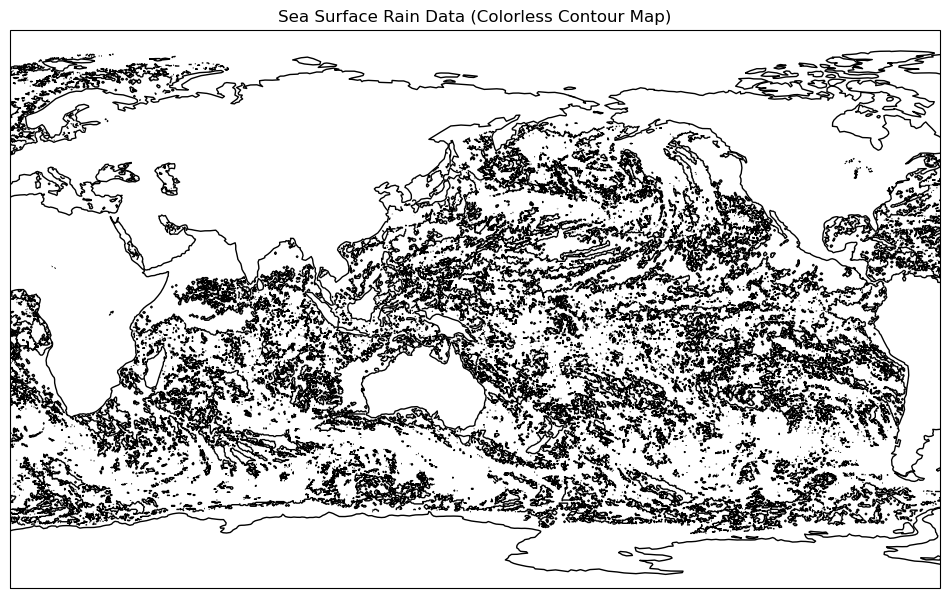

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_colorless_contour(data,title):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    # Create contour plot without color
    contour_levels = 15 # You can adjust the number of contour levels as needed
    contour_plot = ax.contour(data, contour_levels, origin='lower', colors='k', linewidths=1.0, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeature.COASTLINE)

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    ax.set_extent([0, 300, -90, 90], ccrs.PlateCarree())

    # Display the colorless contour map
    plt.show()

# Example usage:
# Assuming you have your rain data in a variable called 'rain_data'
plot_colorless_contour(masked_data,'Sea Surface Rain Data (Colorless Contour Map)')

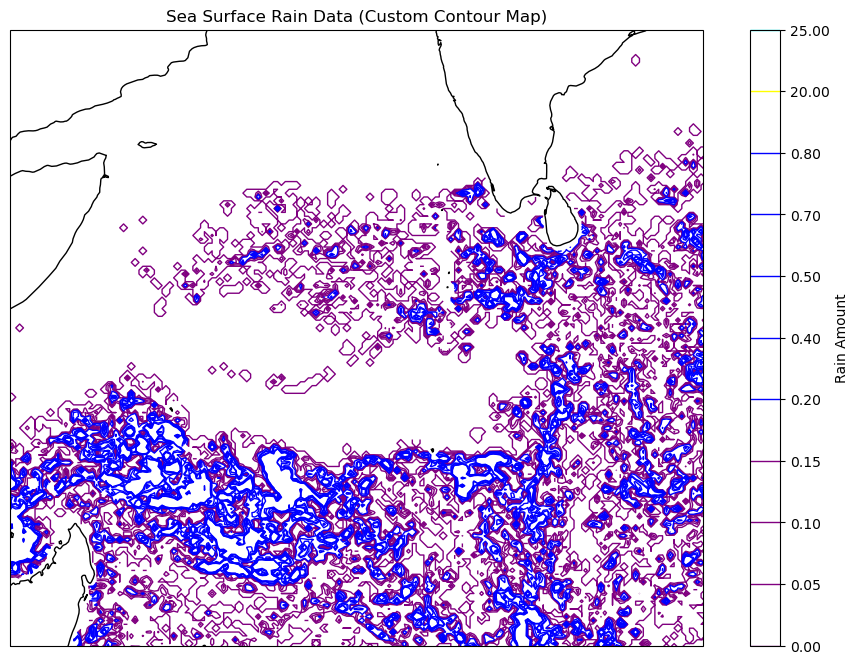

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_custom_contour(data,title, contour_levels=None, contour_colors=None):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    # Determine contour levels if not provided
    if contour_levels is None:
        contour_levels = 10  # Default to 10 equally spaced contour levels
    elif isinstance(contour_levels, int):
        contour_levels = [min(data) + i * (max(data) - min(data)) / (contour_levels - 1) for i in range(contour_levels)]
    else:
        contour_levels = sorted(contour_levels)  # Use custom contour levels provided by the user

    # Determine contour colors if not provided
    if contour_colors is None:
        contour_colors = 'k'  # Default to black color
    else:
        if len(contour_colors) < len(contour_levels):
            raise ValueError("Number of contour colors must be greater than or equal to the number of contour levels.")
    
    # Create contour plot with custom contour values and colors
    contour_plot = ax.contour(data, contour_levels, origin='lower', colors=contour_colors, linewidths=1.0, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeature.COASTLINE)

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    ax.set_extent([0, 300,-90, 90], ccrs.PlateCarree())

    # Add color bar
    colorbar = plt.colorbar(contour_plot, ax=ax, orientation='vertical', ticks=contour_levels, label='Rain Amount')
    colorbar.set_label('Rain Amount')

    # Display the custom contour map with color bar
    plt.show()

# Example usage:
# Assuming you have your rain data in a variable called 'rain_data'
# Specify custom contour values and colors
contour_levels = [0,0.05, 0.1, 0.15, 0.2,0.4,0.5,0.7,0.8,20,25]
contour_colors = ['purple','purple', 'purple', 'purple', 'blue','blue','blue','blue','blue','yellow','cyan']

plot_custom_contour(masked_data, 'Sea Surface Rain Data (Custom Contour Map)',contour_levels,contour_colors)

### Generating Data for 10 different days

In [29]:
files = ["1Apr2016.txt","10Apr2016.txt","20Apr2016.txt","30Apr2016.txt","10May2016.txt","20May2016.txt","30May2016.txt"]
titles = ["Sea Surface Rain on 1 April 2016","Sea Surface Rain on 10 April 2016","Sea Surface Rain on 20 April 2016","Sea Surface Rain on 30 April 2016","Sea Surface Rain on 10 May 2016","Sea Surface Rain on 20 May 2016","Sea Surface Rain on 30 May 2016"]
data = []
for i in range(len(files)):
    data_1 = generate_dataset(files[i])
    data_1 = ma.masked_where(data_1 == BAD_VALUE, data_1)
    data.append((data_1,titles[i]))

### Plotting Contour Maps for different days

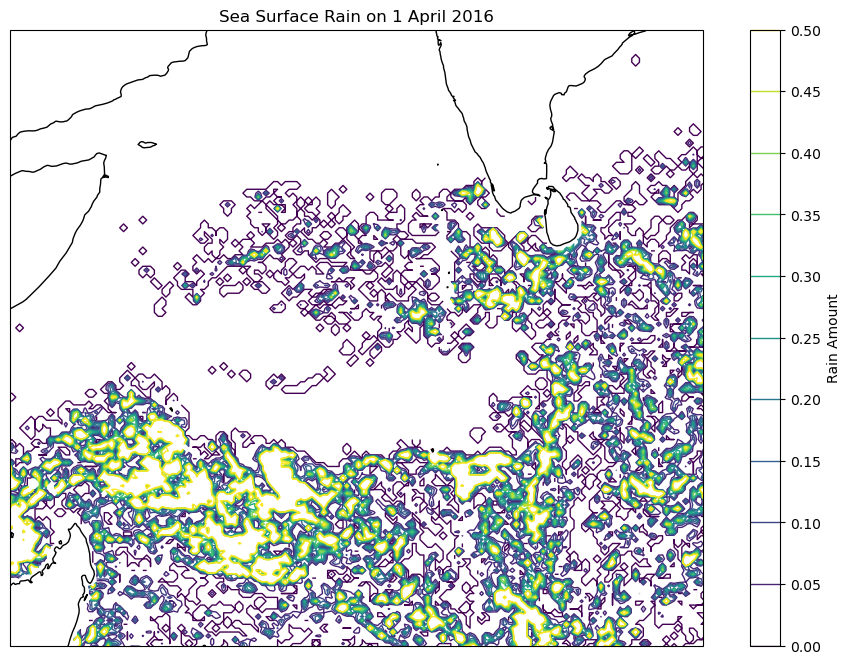

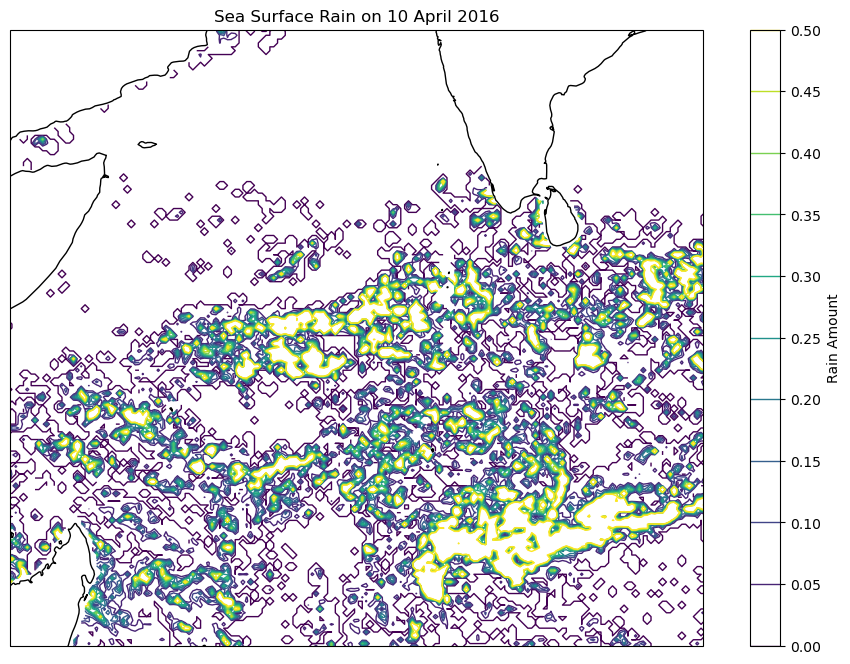

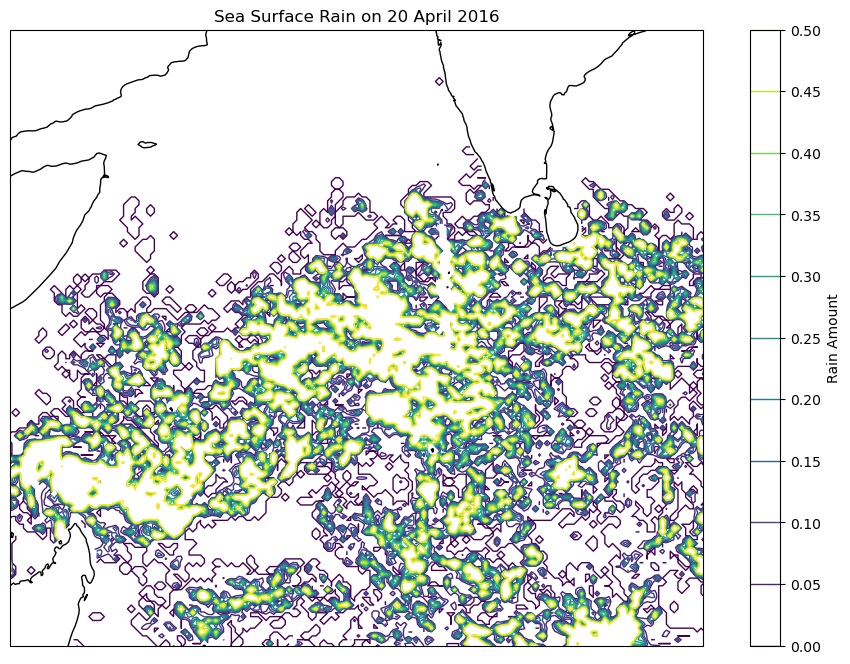

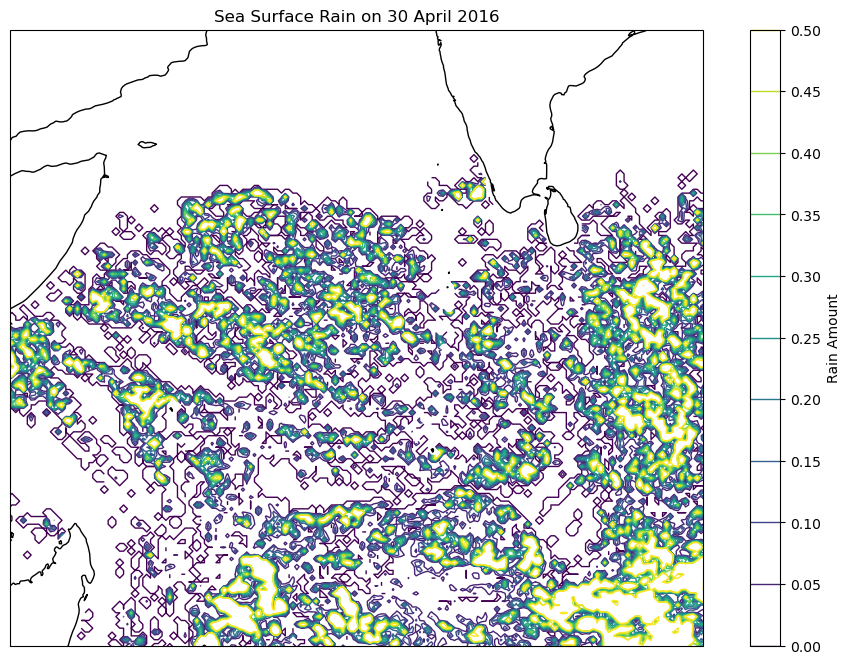

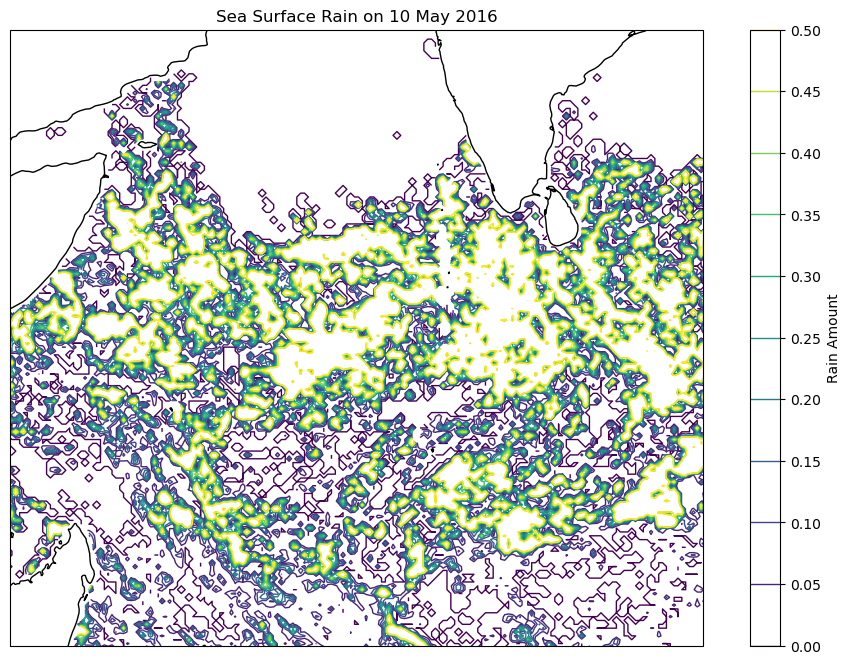

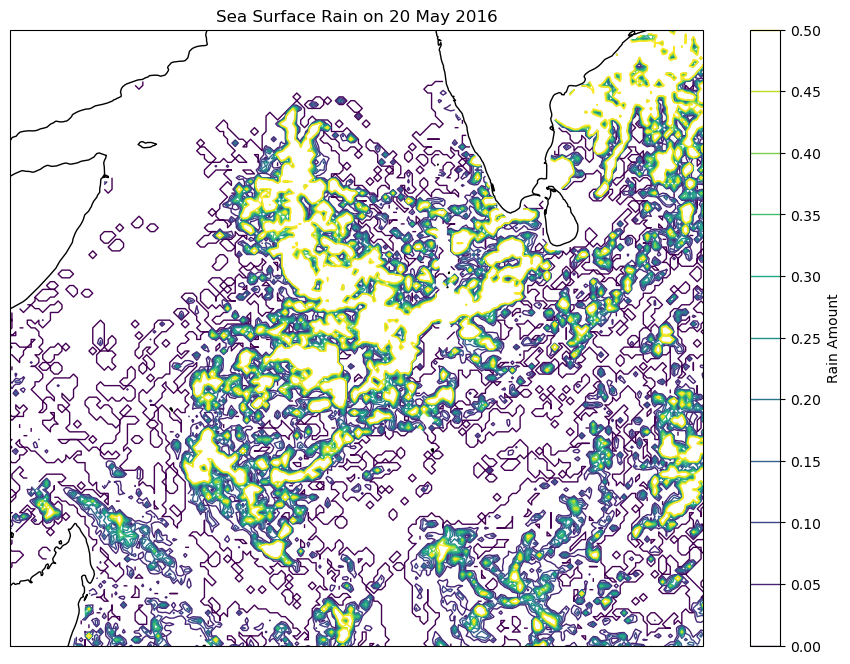

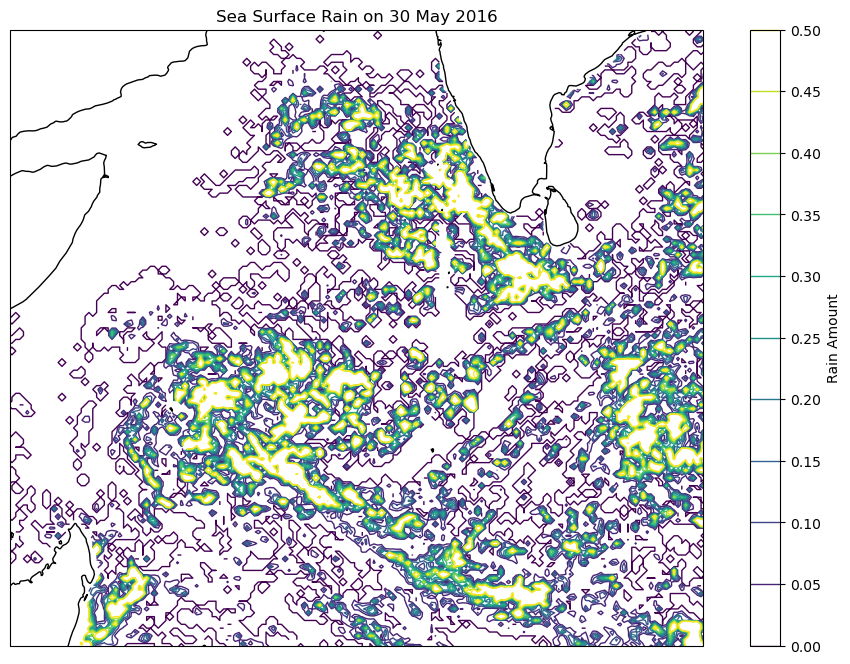

In [36]:
boundaries = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
colors = ['#fde725', '#bddf26', '#7ad151', '#44bf70', '#22a884',
          '#21918c', '#2a788e', '#355f8d', '#414487', '#482475',
          '#440154'][::-1]
for i in range(len(data)):
    plot_custom_contour(data[i][0], data[i][1],boundaries,colors)

In [13]:
def plot(data):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    cax = ax.imshow(data, origin='lower', cmap='viridis', extent=(-180,180,-90,90),transform=ccrs.PlateCarree(central_longitude=180),vmin=0, vmax=0.29)

    ax.add_feature(cfeature.COASTLINE)

    cbar = plt.colorbar(cax, ax=ax, orientation='vertical', label='Sea Surface Rain Amount')

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Sea Surface Rain Data')
    ax.set_extent([0,300,-90,90],ccrs.PlateCarree())
    # Display the map
    plt.show()

In [14]:
data = generate_dataset("1Apr2016.txt")
masked_data = ma.masked_where(data == BAD_VALUE, data)